In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [4]:
import os

In [5]:
path = "Mall_Customers.csv"

In [6]:
data_df = pd.read_csv(path, index_col='CustomerID')

In [7]:
data_df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [8]:
data_df.Genre.value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

In [9]:
data_df.shape

(200, 4)

In [10]:
print(data_df.head(5).to_latex())

\begin{tabular}{llrrr}
\toprule
 & Genre & Age & Annual Income (k$) & Spending Score (1-100) \\
CustomerID &  &  &  &  \\
\midrule
1 & Male & 19 & 15 & 39 \\
2 & Male & 21 & 15 & 81 \\
3 & Female & 20 & 16 & 6 \\
4 & Female & 23 & 16 & 77 \\
5 & Female & 31 & 17 & 40 \\
\bottomrule
\end{tabular}


In [11]:
gender_arr = data_df.Genre.map(lambda x: 1 if x == 'Male' else 0).values

In [12]:
age_arr = data_df.Age.values 
income_arr = data_df['Annual Income (k$)'].values
score_arr = data_df['Spending Score (1-100)'].values

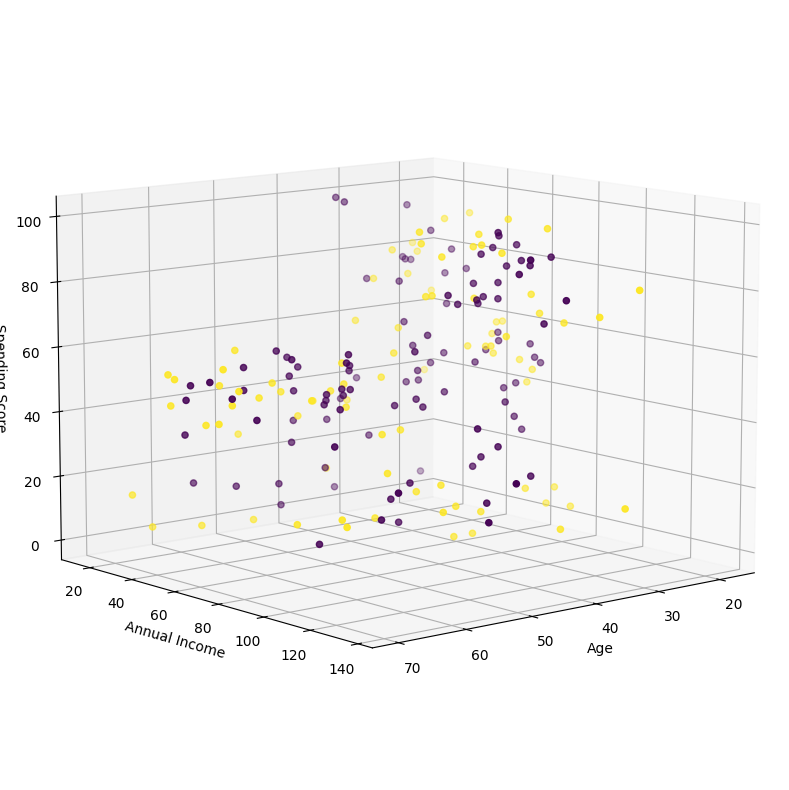

In [13]:
plt.figure(figsize=(15, 10))
ax = plt.subplot(111, projection='3d') 
ax.scatter(age_arr, income_arr, score_arr, c=gender_arr)
ax.set_zlabel('Spending Score')  # 坐标轴
ax.set_ylabel('Annual Income')
ax.set_xlabel('Age')
ax.view_init(elev= 10, azim= 50)
plt.show()

## k-means 聚类

In [14]:
numb_data_df = data_df[[i for i in data_df.columns if 'Genre' != i]]

In [15]:
# 列名
cols_name = numb_data_df.columns
# 行列数
m, n = numb_data_df.shape

In [16]:
# 设置聚类数目
cluster_num = 2

In [17]:
def update_cluster_center(cluster_center_arr, cluster_ele_dict):
    cluster_center_arr = cluster_center_arr.copy()
    cluster_center_err = 0
    for ix, value in enumerate(cluster_center_arr):
        # 类数据到类中心的距离平方和
        cluster_center_err += np.power((np.array(cluster_ele_dict[ix]) - value.reshape(1, -1)), 2).sum()
        # 更新类中心
        cluster_center_arr[ix] = np.r_[np.array(cluster_ele_dict[ix]), value.reshape(1, -1)].mean(axis=0)
        print(cluster_center_arr)
    return cluster_center_arr, cluster_center_err

In [18]:
# 数据集
numb_data_arr = numb_data_df.values.astype('float')

In [19]:
cluster_center_arr = numb_data_arr[-2:]

In [20]:
cluster_center_arr

array([[ 32., 137.,  18.],
       [ 30., 137.,  83.]])

In [21]:

# 初始化聚类中心
# cluster_center_arr = np.random.randn(cluster_num, n)
cluster_center_arr = numb_data_arr[-2:]
iter_num = 20
while iter_num >= 0:
    # 类元素存储字典
    cluster_ele_dict = {i:[] for i in range(cluster_num)}
    for num, value in enumerate(numb_data_arr):
        # 欧式距离最小索引
        min_val_index = np.argmin(pow(value - cluster_center_arr, 2).sum(axis = 1))
        cluster_ele_dict[min_val_index].append(list(value))

    new_cluster_center, rss_value = update_cluster_center(cluster_center_arr, cluster_ele_dict)
    if np.max(new_cluster_center - cluster_center_arr) < 1e-12:
        break
    else:
        cluster_center_arr = new_cluster_center
    
    iter_num -= 1

[[ 43.0754717   61.23584906  30.26415094]
 [ 30.         137.          83.        ]]
[[43.0754717  61.23584906 30.26415094]
 [34.02083333 61.40625    72.21875   ]]
[[45.20440252 59.90959119 30.97466806]
 [34.02083333 61.40625    72.21875   ]]
[[45.20440252 59.90959119 30.97466806]
 [31.54277482 61.32347074 72.31083777]]
[[45.83067029 59.55774406 31.73851052]
 [31.54277482 61.32347074 72.31083777]]
[[45.83067029 59.55774406 31.73851052]
 [30.32464588 61.7837744  72.75066855]]
[[46.12896235 59.30050212 32.6672914 ]
 [30.32464588 61.7837744  72.75066855]]
[[46.12896235 59.30050212 32.6672914 ]
 [29.21062811 62.22739971 73.42242148]]
[[46.16490485 59.3646595  32.88506286]
 [29.21062811 62.22739971 73.42242148]]
[[46.16490485 59.3646595  32.88506286]
 [28.95593754 62.17706279 73.62119095]]
[[46.1652147  59.36521258 32.8869402 ]
 [28.95593754 62.17706279 73.62119095]]
[[46.1652147  59.36521258 32.8869402 ]
 [28.95297602 62.17647747 73.62350222]]
[[46.16521737 59.36521735 32.88695638]
 [28.95

In [22]:
cluster_center_arr

array([[46.16521739, 59.36521739, 32.88695652],
       [28.95294118, 62.17647059, 73.62352941]])

In [23]:
rss_value

np.float64(212840.16982097185)

In [24]:
# cluster_ele_dict

## sklearn 聚类

In [25]:
from sklearn.cluster import KMeans

In [26]:
clf = KMeans(max_iter=20, n_clusters=2, init='k-means++', tol=1e-12)

In [27]:
clf.fit(numb_data_arr)

KMeans(max_iter=20, n_clusters=2, tol=1e-12)

In [28]:
clf.cluster_centers_

array([[36.21641791, 57.63432836, 64.35820896],
       [44.1969697 , 66.5       , 21.45454545]])

In [29]:
# clf.cluster_centers_

In [30]:
clf.inertia_

221123.9149706015

In [31]:
clf.labels_

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)